# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

In [10]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 10
threshold = 0.1
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


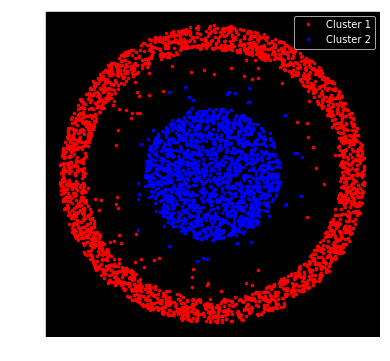

In [54]:
# implement spectral in spectral
from spectral import spectral

idx, _ = spectral(W, 2)
cluster_plot(X, idx)

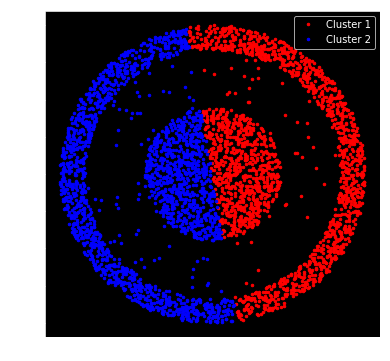

In [12]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [45]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [46]:
fea.shape

(1319, 14964)

In [87]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
# YOUR CODE HERE
# begin answer
repeat_time = 1000
k = 5
N = gnd.shape[0]

W2 = constructW(fea.A)
W2 = W2.A
idx, zs = spectral(W2, k)

In [96]:
fea_spec = zs[:, :k]
acc_spec = mi_spec = acc_kmeans = mi_kmeans = 0

for _ in range(repeat_time):
    pred_spec = kmeans(fea_spec, k)
    pred_spec = bestMap(gnd, pred_spec)

    acc_spec += np.sum(pred_spec == gnd) / N
    mi_spec += MutualInfo(gnd, pred_spec)

print('Spectral cluster acc:', acc_spec/repeat_time, ' normalized mutual information', mi_spec/repeat_time)
# end answer

Spectral cluster acc: 0.7314632297194844  normalized mutual information 0.5966423493417583


In [98]:
for _ in range(repeat_time):
    pred_kmeans = kmeans(fea.A, k)
    
    acc_kmeans += np.sum(pred_kmeans == gnd) / N
    mi_kmeans += MutualInfo(gnd, pred_kmeans)
print('Kmeans cluster acc:', acc_kmeans/repeat_time, ' normalized mutual information', mi_kmeans/repeat_time)

Kmeans cluster acc: 0.13669446550416983  normalized mutual information 0.44718706226004096
